In [1]:
import platform
import psutil
import time
import matplotlib.pyplot as plt
import numpy as np
import platform

In [2]:
# Step 1: Gather System Information
def get_system_info():
    system_info = {
        "Operating System": platform.system() + " " + platform.release(),
        "CPU": platform.processor(),
        "RAM": f"{round(psutil.virtual_memory().total / (1024 ** 3), 2)} GB"
    }
    print("System Information:", system_info)

In [4]:
# Step 2: Implement Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

# Step 2: Implement Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Step 2: Implement Selection Sort
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

In [5]:
# Step 3: Benchmarking Sorting Algorithms
def benchmark_sort(sort_func, sizes):
    times = []
    for size in sizes:
        arr = np.random.randint(0, 10000, size).tolist()  # Generate random list of integers
        start_time = time.time()                          # Start timing
        sort_func(arr)                                   # Sort using the provided sort function
        times.append(time.time() - start_time)           # Record elapsed time
    return times

In [6]:
# Step 4: Define Input Sizes and Run Benchmarks
sizes = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 15000]

# Gather system information
get_system_info()


System Information: {'Operating System': 'Linux 6.5.0-1022-azure', 'CPU': 'x86_64', 'RAM': '7.74 GB'}


In [7]:
# Benchmark sorting algorithms
bubble_sort_times = benchmark_sort(bubble_sort, sizes)
insertion_sort_times = benchmark_sort(insertion_sort, sizes)
selection_sort_times = benchmark_sort(selection_sort, sizes)

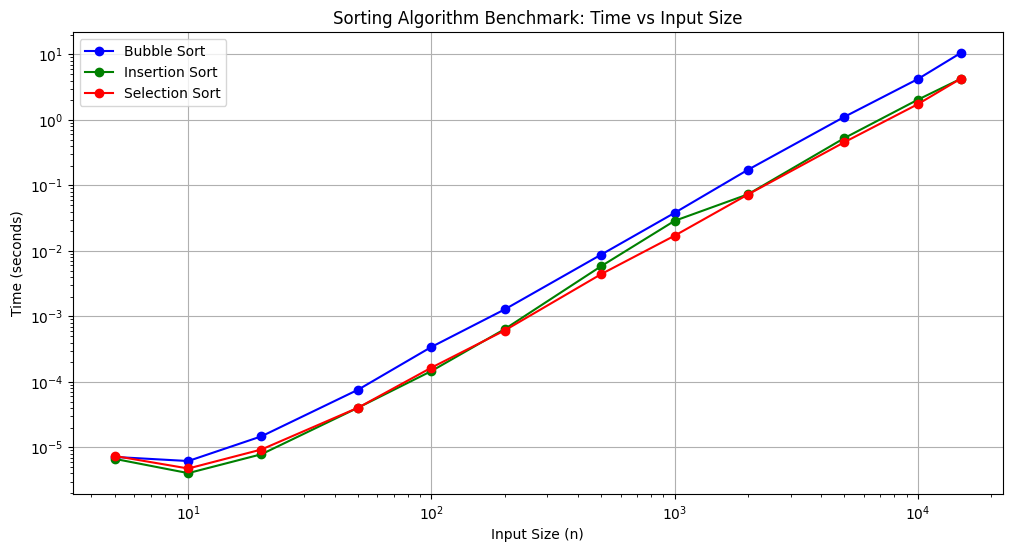

In [8]:
# Step 5: Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(sizes, bubble_sort_times, marker='o', color='b', label='Bubble Sort')
plt.plot(sizes, insertion_sort_times, marker='o', color='g', label='Insertion Sort')
plt.plot(sizes, selection_sort_times, marker='o', color='r', label='Selection Sort')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Benchmark: Time vs Input Size')
plt.legend()
plt.grid(True)
plt.show()